In [1]:
import os
import re

import numpy as np
import torch
import tqdm

### 定义几个辅助函数：
↓👇以下是两个表：单词->单词序号；单词序号->词向量。


In [2]:
word_list = []
vocabulary_vectors = []
# glove_data = open('data/glove.6B.50d.txt', encoding='utf-8')
glove_data = open('data/glove.6B.100d.txt', encoding='utf-8') # 我下下来的glove是100d，yyt你要用的话记得改回上一行（）
for line in glove_data.readlines():
    temp = line.strip('\n').split(' ')  # 一个列表
    name = temp[0]
    word_list.append(name.lower())
    vector = [temp[i] for i in range(1, len(temp))]  # 向量
    vector = list(map(float, vector))  # 变成浮点数
    vocabulary_vectors.append(vector)
# 保存
vocabulary_vectors = np.array(vocabulary_vectors)
word_list = np.array(word_list)
np.save('npys/vocabulary_vectors', vocabulary_vectors)
# np.save('npys/word_list', word_list)
# 保存你🐎呢，马上就用了
# word_list = np.load('npys/word_list.npy', allow_pickle=True)

# 直接tm给你转成哈希表，傻子才用list一个一个搜索呢，堪称头部螺旋桨
word_list = word_list.tolist()
word2index={} # word->index
for i in range(len(word_list)):
    word2index[word_list[i]]=i

↓👇这个用来从文件中加载原始文本数据并处理成单词列表

In [3]:
def load_data(path, flag='train'):
    labels = ['pos', 'neg']
    data = []
    r = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n。！，]+'
    compiled = re.compile(r)
    for label in labels:
        files = os.listdir(os.path.join(path, flag, label))
        # 去除标点符号
        for file in tqdm.tqdm(files): # Don't be nervous, tqdm is only a progress bar. 
            with open(os.path.join(path, flag, label, file), 'r', encoding='utf8') as rf:
                temp = rf.read()
                temp = temp.replace('\n', ' ').replace('<br /><br />', ' ')
                temp = re.sub(r, ' \g<0> ', temp)
                temp = temp.split(' ')
                temp = [temp[i].lower() for i in range(len(temp)) if temp[i] != '']
                if label == 'pos':
                    data.append([temp, 1])
                elif label == 'neg':
                    data.append([temp, 0])
            #break # Remember to delete this
    return data

↓👇这个用来把所有文本转成numpy数组，然后存在文件里。至此，预处理完成。

In [4]:
def process_sentence(flag: str, path: str = 'data/aclImdb', length_limit: int = 250):
    '''Process data into numpy arrays and save them. 
    ---
    They look like: 
    
    sentence_code: [[word IDs], [word IDs], ...]
    
    labels: [label, label, ...]
    
    flag should be either "train" or "test". 
    '''
    output_dir = os.path.join("./npys", flag)
    os.makedirs(output_dir, exist_ok=True)
    if os.path.exists(os.path.join(output_dir, "sentence_code.npy")) and os.path.exists(os.path.join(output_dir, "labels.npy")):
        print("大哥，你已经预处理过了🤣")
        return []
    
    sentence_code = []
    labels = []
    length=[0 for i in range(1000)] # 统计评论长度分布
    test_data = load_data(path, flag)
    cnt=0
    for i in tqdm.tqdm(range(len(test_data))): # Don't be nervous, tqdm is only a progress bar. 
        # print(i)
        vec = test_data[i][0]
        label = test_data[i][1] # 0 or 1
        temp = []
        index = 0
        for j in range(len(vec)):
            try:
                index = word2index[vec[j]]
            except KeyError:  # 没找到
                index = 400000
            finally:
                temp.append(index)  # temp表示一个单词在词典中的序号
        
        l=len(temp)
        if l>=1000:
            l=999
        length[l]+=1
        if l<length_limit:
            for k in range(l, 250):  # 不足补0
                temp.append(0)
        else:
            temp = temp[0:250]  # 只保留250个
        sentence_code.append(temp)
        labels.append(label)
        cnt += 1

    sentence_code = np.array(sentence_code)
    np.save(os.path.join(output_dir, "sentence_code"), sentence_code)
    np.save(os.path.join(output_dir, "labels"), labels)
    return length


测试一下，看看数据发育正不正常啊

In [12]:
result_train = process_sentence("train")
result_test = process_sentence("test")

大哥，你已经预处理过了🤣
大哥，你已经预处理过了🤣


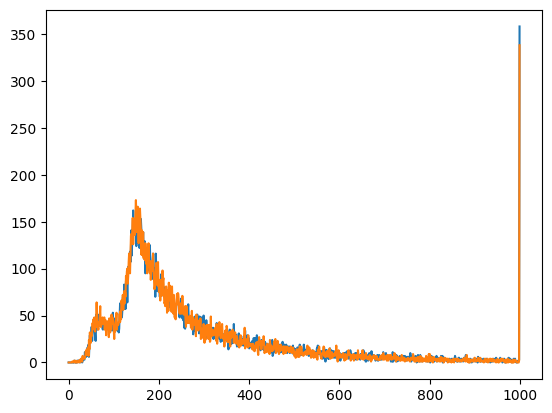

In [6]:
import matplotlib.pyplot as plt

plt.plot(result_train)
plt.plot(result_test)

In [11]:
word2index["fuck"]

35690